# K-Means Clustering
K-Means is an unsupervised machine learning algorithm used to group data into K clusters based on similarity.

It groups data points such that:

Points within the same cluster are similar

Points in different clusters are dissimilar

**K-Means works by:**

-Choosing K cluster centers (called centroids)

-Assigning each data point to the nearest centroid

-Updating centroids based on assigned points *Repeating until clusters become stable

**Used in:**

Customer segmentation

Image compression

Product recommendation

Grouping similar data points

# Concept of Clustering (Unsupervised Learning)
Clustering is an unsupervised learning technique where the model tries to find hidden patterns or natural groups in data without labels.

No target/output column is given. The algorithm automatically discovers structure in the data.

Examples:

-Grouping customers based on buying behavior

-Grouping news articles by topic

-Grouping students based on performance patterns

**Key point:**

There is NO correct answer — the algorithm groups based on similarity.

**Problem Statement**

Using Iris data Cluster Iris class into different clusters based on similarity

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
!python --version

Python 3.12.4


In [15]:
np.__version__
#import numpy==1.16 
#!pip install --force-reinstall numpy==1.20   #Force reinstall a specific version

'1.26.4'

In [17]:
#pip install --upgrade --force-reinstall numpy scipy threadpoolctl

In [21]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
#data = pd.read_csv('Iris.csv',index_col = 'Id')
#df = sns.load_dataset('iris')
data = pd.read_csv('Iris.csv')

In [5]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
# Basic checks
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
data.shape

(150, 6)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [26]:
x = data.drop(['Species','Id'],axis=1)
y = data.Species

In [29]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
from sklearn.cluster import KMeans

In [15]:
model = KMeans(n_clusters=3,random_state=42)

In [16]:
model.fit(x)

NameError: name 'x' is not defined

In [36]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [39]:
x1 = pd.DataFrame()
x1[0] = model.labels_
x1[1] = y.values
x1.rename(columns={0: "KMeans"}, inplace=True)
x1.rename(columns={1: "Actual"}, inplace=True)
pd.set_option('display.max_rows',None)
x1

,KMeans,Actual
0,1,Iris-setosa
1,1,Iris-setosa
2,1,Iris-setosa
3,1,Iris-setosa
4,1,Iris-setosa
5,1,Iris-setosa
6,1,Iris-setosa
7,1,Iris-setosa
8,1,Iris-setosa
9,1,Iris-setosa


In [41]:
model.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [33]:
wcss = model.inertia_
wcss

152.36870647733906

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
#Demonstrating Elbow technique to find the right k
wcss1 = []
x_list = []
for i in range(1,10):
    model = KMeans(n_clusters=i,random_state=42)
    model.fit(x)
    wcss1.append(model.inertia_)
    x_list.append(i)

In [37]:
wcss1

[680.8244000000001,
 152.36870647733906,
 78.94506582597731,
 57.44028021295474,
 46.53558205128205,
 39.251830892636775,
 35.04275995246583,
 30.21702112215271,
 28.756456196581205]

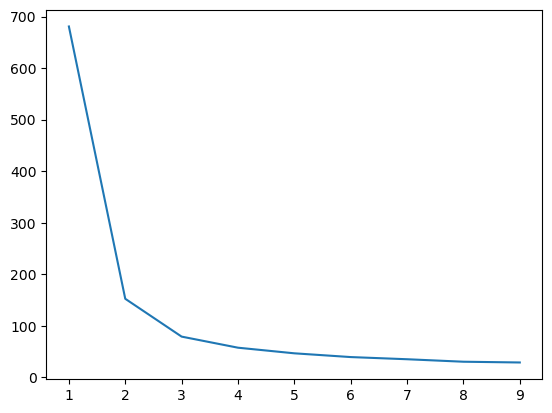

In [39]:
plt.plot(x_list,wcss1)

In [41]:
from sklearn.metrics import silhouette_score
ss = silhouette_score(x,model.labels_)
ss

0.31259234994972684

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

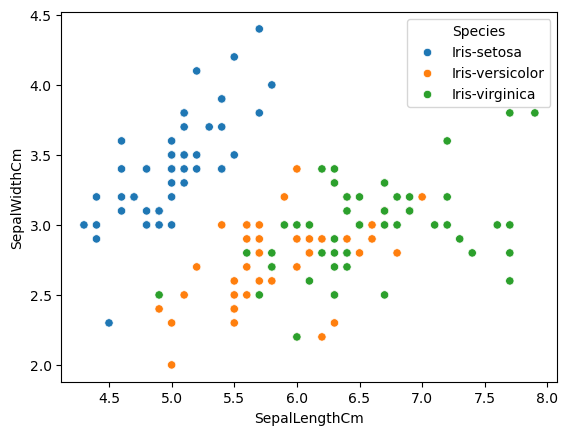

In [43]:
sns.scatterplot(x=data.SepalLengthCm,y=data.SepalWidthCm,data=data,hue=data.Species)

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

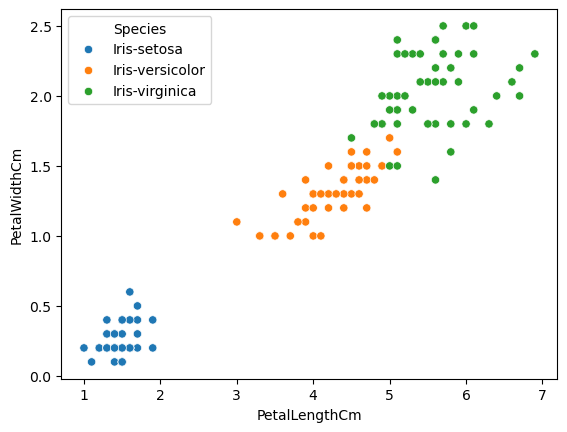

In [17]:
sns.scatterplot(data=data,x='PetalLengthCm',y='PetalWidthCm',hue='Species')

# Data Preprocesssing

In [18]:
# check for missing values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [19]:
#check for duplicates
data.duplicated().sum()

np.int64(0)

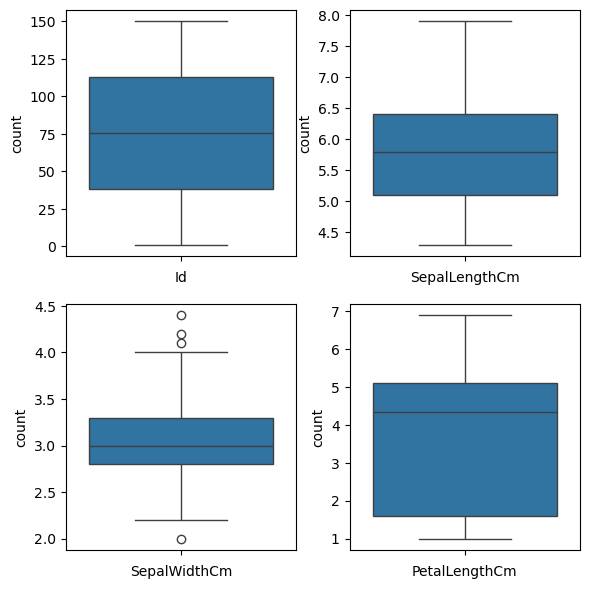

In [20]:
# check for outliers
plt.figure(figsize=(6,6))
plotnumber=1

for column in data.drop('Species',axis=1):
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
        plt.ylabel("count")
    plotnumber+=1
plt.tight_layout()

<Axes: xlabel='SepalWidthCm', ylabel='Count'>

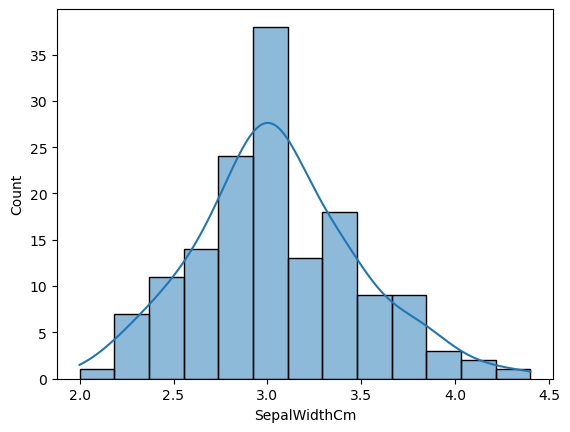

In [21]:
sns.histplot(data=data,x='SepalWidthCm',kde=True)

In [22]:
# 3-sigma rule
lower_limit=data['SepalWidthCm'].mean()-3*data['SepalWidthCm'].std()
upper_limit=data['SepalWidthCm'].mean()+3*data['SepalWidthCm'].std()
print("Lower limit is",lower_limit)
print("upper limit is",upper_limit)

Lower limit is 1.7532170659134791
upper limit is 4.354782934086521


In [23]:
#find values less than lower limit
data.loc[data['SepalWidthCm']<lower_limit]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [24]:
#find values greater than upper limit
data.loc[data['SepalWidthCm']>upper_limit]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,16,5.7,4.4,1.5,0.4,Iris-setosa


In [25]:
# replace oulier with mean
data.loc[data['SepalWidthCm']>upper_limit,'SepalWidthCm']=data['SepalWidthCm'].mean()

<Axes: xlabel='SepalWidthCm'>

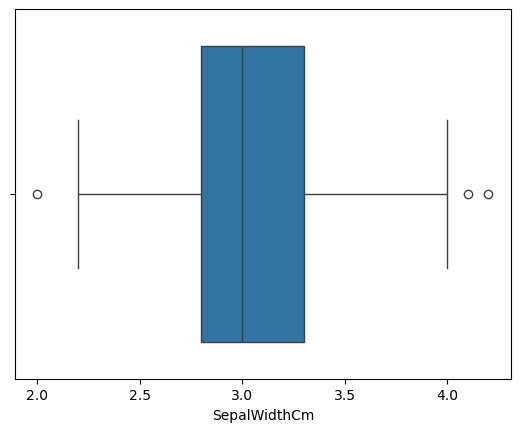

In [26]:
sns.boxplot(data=data,x='SepalWidthCm')

In [ ]:
## still it showingh dots means they are not ouliers ,outliers are removed using 3sigma rule

In [27]:
# Apply scaling
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]=scaling.fit_transform(data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

In [28]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,-0.900681,1.088864,-1.341272,-1.312977,Iris-setosa
1,2,-1.143017,-0.107760,-1.341272,-1.312977,Iris-setosa
2,3,-1.385353,0.370890,-1.398138,-1.312977,Iris-setosa
3,4,-1.506521,0.131565,-1.284407,-1.312977,Iris-setosa
4,5,-1.021849,1.328189,-1.341272,-1.312977,Iris-setosa


In [29]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,75.500000,-4.736952e-16,-3.079019e-16,3.315866e-16,-2.842171e-16
std,43.445368,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,1.000000,-1.870024e+00,-2.501008e+00,-1.568735e+00,-1.444450e+00
25%,38.250000,-9.006812e-01,-5.864097e-01,-1.227541e+00,-1.181504e+00
50%,75.500000,-5.250608e-02,-1.077600e-01,3.362659e-01,1.332259e-01
75%,112.750000,6.745011e-01,6.102145e-01,7.627586e-01,7.905908e-01
max,150.000000,2.492019e+00,2.764138e+00,1.786341e+00,1.710902e+00


In [30]:
#Remove target from data bcs we are using unsupervised learning
x=data.drop('Species',axis=1)

In [31]:
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,-0.900681,1.088864,-1.341272,-1.312977
1,2,-1.143017,-0.107760,-1.341272,-1.312977
2,3,-1.385353,0.370890,-1.398138,-1.312977
3,4,-1.506521,0.131565,-1.284407,-1.312977
4,5,-1.021849,1.328189,-1.341272,-1.312977
...,...,...,...,...,...
145,146,1.038005,-0.107760,0.819624,1.447956
146,147,0.553333,-1.304384,0.705893,0.922064
147,148,0.795669,-0.107760,0.819624,1.053537
148,149,0.432165,0.849539,0.933356,1.447956


In [32]:
# import K-Mean model
from sklearn.cluster import KMeans
# intialize model
model=KMeans(n_clusters=6,random_state=10) #we can change the nu,ner of clusters
# train model
model.fit(x)

C:\Users\Art Computer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6, random_state=10)

In [33]:
# Centroids-clusters centers
# no of clusters is same as number of centroids
model.cluster_centers_

array([[ 1.15500000e+02,  9.26934209e-01, -2.87253631e-01,
         1.05656478e+00,  1.06449281e+00],
       [ 4.00000000e+01, -8.01951794e-01,  7.25445007e-01,
        -1.10117277e+00, -1.07924700e+00],
       [ 6.65000000e+01,  1.94489966e-01, -6.96867303e-01,
         3.20955866e-01,  2.04019081e-01],
       [ 1.39000000e+02,  9.06300550e-01, -5.57328593e-02,
         9.72914505e-01,  1.08783403e+00],
       [ 1.35000000e+01, -9.89226922e-01,  8.72919566e-01,
        -1.30409098e+00, -1.25229689e+00],
       [ 9.15000000e+01, -3.23114321e-02, -6.66184631e-01,
         3.14941224e-01,  2.42786751e-01]])

In [34]:
model.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

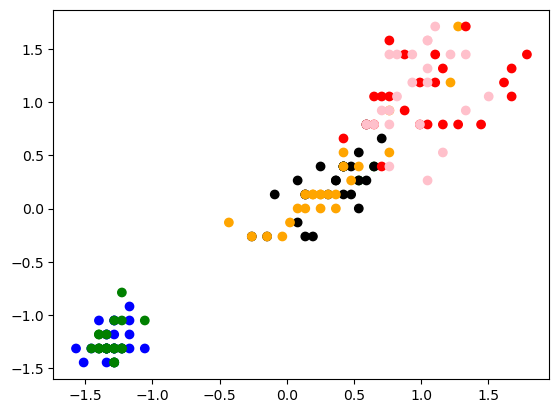

In [35]:
# Visualize the clusters created by model
color_schema=np.array(["red","green","black","pink","blue","orange"])
plt.scatter(data.PetalLengthCm,data.PetalWidthCm,color=color_schema[model.labels_])

In [36]:
data['labels']=pd.DataFrame(model.labels_)

In [37]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels
0,1,-0.900681,1.088864,-1.341272,-1.312977,Iris-setosa,4
1,2,-1.143017,-0.107760,-1.341272,-1.312977,Iris-setosa,4
2,3,-1.385353,0.370890,-1.398138,-1.312977,Iris-setosa,4
3,4,-1.506521,0.131565,-1.284407,-1.312977,Iris-setosa,4
4,5,-1.021849,1.328189,-1.341272,-1.312977,Iris-setosa,4
...,...,...,...,...,...,...,...
145,146,1.038005,-0.107760,0.819624,1.447956,Iris-virginica,3
146,147,0.553333,-1.304384,0.705893,0.922064,Iris-virginica,3
147,148,0.795669,-0.107760,0.819624,1.053537,Iris-virginica,3
148,149,0.432165,0.849539,0.933356,1.447956,Iris-virginica,3


In [38]:
from sklearn.metrics import silhouette_score
silhouette_score(x,model.labels_)


np.float64(0.5264658512615039)

In [39]:
# we see overlapping of clusters bcs number of clusters we have choosen might be wrong

# How to find optimal value for K?
# Elbow Method
Choosing K using Elbow Method

K-Means requires us to choose the number of clusters (K). The Elbow Method helps find the best K.

# How Elbow Method Works?
*Try different values of K (e.g., 1 to 10).

For each K, calculate WCSS → WCSS = Within-Cluster Sum of Squares (How spread-out the points are inside clusters)

Plot K vs WCSS. The point where the curve bends sharply like an elbow is the optimal K.

Meaning
Too few clusters → high WCSS (bad)

Too many clusters → low WCSS but unnecessary splitting

Choose the K where adding more clusters does not reduce WCSS significantly

In simple words:

The “elbow point” is where the improvement starts slowing down.

Elbow Method Example

In [40]:
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.088864,-1.341272,-1.312977
1,-1.143017,-0.107760,-1.341272,-1.312977
2,-1.385353,0.370890,-1.398138,-1.312977
3,-1.506521,0.131565,-1.284407,-1.312977
4,-1.021849,1.328189,-1.341272,-1.312977


# Elbow Method on iris dataset


C:\Users\Art Computer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Art Computer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Art Computer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Art Computer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to 

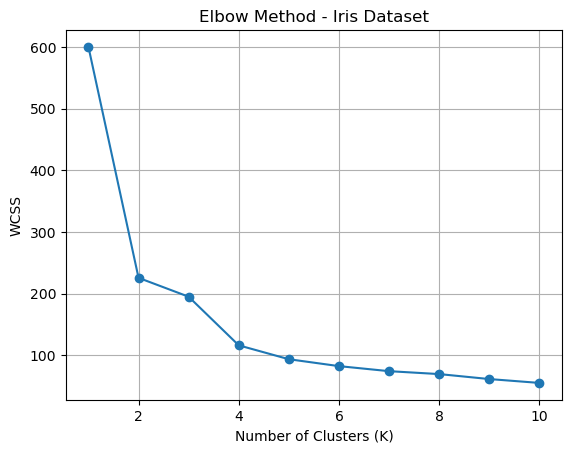

In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

# Trying K from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method - Iris Dataset")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [43]:
# For Iris, the “elbow” almost always appears at K = 3, matching the 3 species in the dataset.

In [44]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

data.head()

C:\Users\Art Computer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels,Cluster
0,1,-0.900681,1.088864,-1.341272,-1.312977,Iris-setosa,4,2
1,2,-1.143017,-0.107760,-1.341272,-1.312977,Iris-setosa,4,1
2,3,-1.385353,0.370890,-1.398138,-1.312977,Iris-setosa,4,1
3,4,-1.506521,0.131565,-1.284407,-1.312977,Iris-setosa,4,1
4,5,-1.021849,1.328189,-1.341272,-1.312977,Iris-setosa,4,2


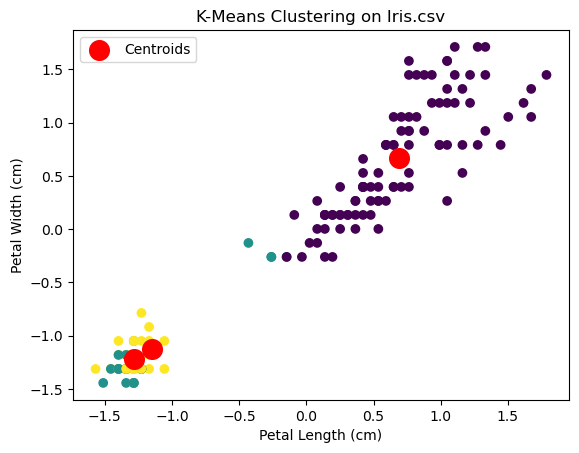

In [45]:
plt.scatter(data['PetalLengthCm'], data['PetalWidthCm'], 
            c=data['Cluster'], cmap='viridis')

# Plot centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], 
            s=200, c='red', label='Centroids')

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("K-Means Clustering on Iris.csv")
plt.legend()
plt.show()